In [1]:
import numpy as np
import scipy as sp
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
# read in health indicator CSV file:
dat = pd.read_csv("../data/heart_disease_health_indicators_BRFSS2015.csv")
dat.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


### Data Description
* Each row represents a unique patient. (253680 observations)
* Each column represents a health indicator. (22 features)
- consists of three types of variable indicating either (i) categorical (1 or 0), (ii) Frequency (int), (iii) Likert-scale (1-5)
* Data was collected by the Behavioral Risk Factor Surveillance System (BRFSS), a health-related telephone survey in 2015. Data is collected annually by the Centers for Disease Control (CDC). Note: data has already been preliminarily cleaned prior to the upload to kaggle. We will directly use the cleaned data.
* Data source: https://www.kaggle.com/datasets/alexteboul/heart-disease-health-indicators-dataset?resource=download

* Feature Description: (name and type)
- HeartDiseaseorAttack (yes = 1.0, no = 0.0)
- HighBP (yes = 1.0, no = 0.0)
- HighChol (yes = 1.0, no = 0.0)
- CholCheck (yes = 1.0, no = 0.0)
- BMI (int)
- Smoker (yes = 1.0, no = 0.0)
- Stroke (yes = 1.0, no = 0.0)
- Diabetes (0: no, 1: type 1, 2: type 2)
- PhysActivity (yes = 1.0, no = 0.0)
- Fruits (yes = 1.0, no = 0.0)
- Veggies (yes = 1.0, no = 0.0)
- HvyAlcoholConsump (yes = 1.0, no = 0.0)
- AnyHealthcare (yes = 1.0, no = 0.0)
- NoDocbcCost (yes = 1.0, no = 0.0)
- GenHlth (1-5, likert)
- MentHlth (int, 1-30, likert)
- PhysHlth (int, 1-30, likert)
- DiffWalk (yes = 1.0, no = 0.0)
- Sex (male:1 or female:0)
- Age (int, 1-13)
- Education (int, 1-6)
- Income (int, 1-8)

* There are 0 missing values.

In [3]:
colnames = list(dat.columns)
print(colnames)

['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']


In [4]:
dat.dtypes

HeartDiseaseorAttack    float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
Diabetes                float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

In [5]:
dat.isnull().sum()

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

### Summary Statistics

In [6]:
dat.describe()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.094186,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.296921,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.292087,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.698160,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


### Preliminary Visualizations

<AxesSubplot:>

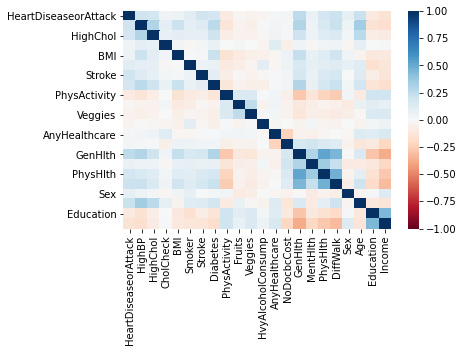

In [7]:
# Correlation Heatmap
ryb = matplotlib.colors.LinearSegmentedColormap.from_list(
    "", ["green", "yellow", "red"]
)
corr = dat.corr()
corr.style.set_precision(3).background_gradient(cmap="RdBu", vmin=-1, vmax=1)
sns.heatmap(corr, vmin=-1, vmax=1, cmap="RdBu")

### Analysis

1. Log-odds to find variables w/ the strongest relationship with heart disease. 

2. Independence Test between variables regarding the onset of heart-disease/heart attack: 
    (i) $\chi^{2}$ independence test. Assumptions: (a) samples are randomly selected, (b) expected count on average >= 5, (c) number of samples $n_i, n_j$ for i,j = {HeartDiseaseAttack,...,Education}, is not very different. 
    (ii) Permutation Test
    (iii) Comments: $\chi^{2}$ independence test has a higher power if assumptions are met. Otherwise, permutation test has a higher power. 
    
3. Does the level of category X_i have a significant effect on heart-disease? (E.g. X_i = Education, or Income, or GenHlth)
i.e. Is the functional distribution, of all levels of a categorical variable, equal? 
- ANOVA (Assumptions: (a) random samples, (b) k groups are independent, (c) k groups have equal sd-- levene test, (d) error terms are iid normal w/ mean=0, and equal var)
- Nonparametric ANOVA (K-sample permutation Test) 

### ML/Prediction
1. SVM
2. Naive Bayes
3. kNN
4. k-means clustering